In [16]:
import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

# Clustering Variation Graphs with Ricci-Flow

In [17]:
import numpy as np
from panricci.panricci_similarity import PanRicciSimilarity

In [18]:
panricci = PanRicciSimilarity(alpha=0.5)
gfas = list(Path("../data/").rglob("*.gfa"))
gfas

[PosixPath('../data/test4.gfa'),
 PosixPath('../data/test3.gfa'),
 PosixPath('../data/test2.gfa'),
 PosixPath('../data/test5.gfa'),
 PosixPath('../data/test1.gfa'),
 PosixPath('../data/test0.gfa')]

In [19]:
# Distannce matrix
M = np.zeros((len(gfas),len(gfas)))
for i, path_graph1 in enumerate(gfas[:-1]):
    for j, path_graph2 in enumerate(gfas[i+1:]):
        
        similarity, alignment = panricci(path_graph1, path_graph2)
        M[i,i+1+j] = 1 - similarity

Ricci-Flow: 100%|██████████| 10/10 [00:00<00:00, 1207.17it/s]


In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
D = M+M.T
clustering = AgglomerativeClustering(n_clusters=2).fit(D)

/home/avila/.local/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [22]:
for gfa, label in zip(gfas, clustering.labels_):
    print(gfa, label)

../data/test4.gfa 0
../data/test3.gfa 0
../data/test2.gfa 1
../data/test5.gfa 0
../data/test1.gfa 1
../data/test0.gfa 1


##  Plot

In [23]:
import seaborn as sns 
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc 

linkage = hc.linkage(sp.distance.squareform(D), method='average')

Text(0.5, 1.05, 'PanRicci')

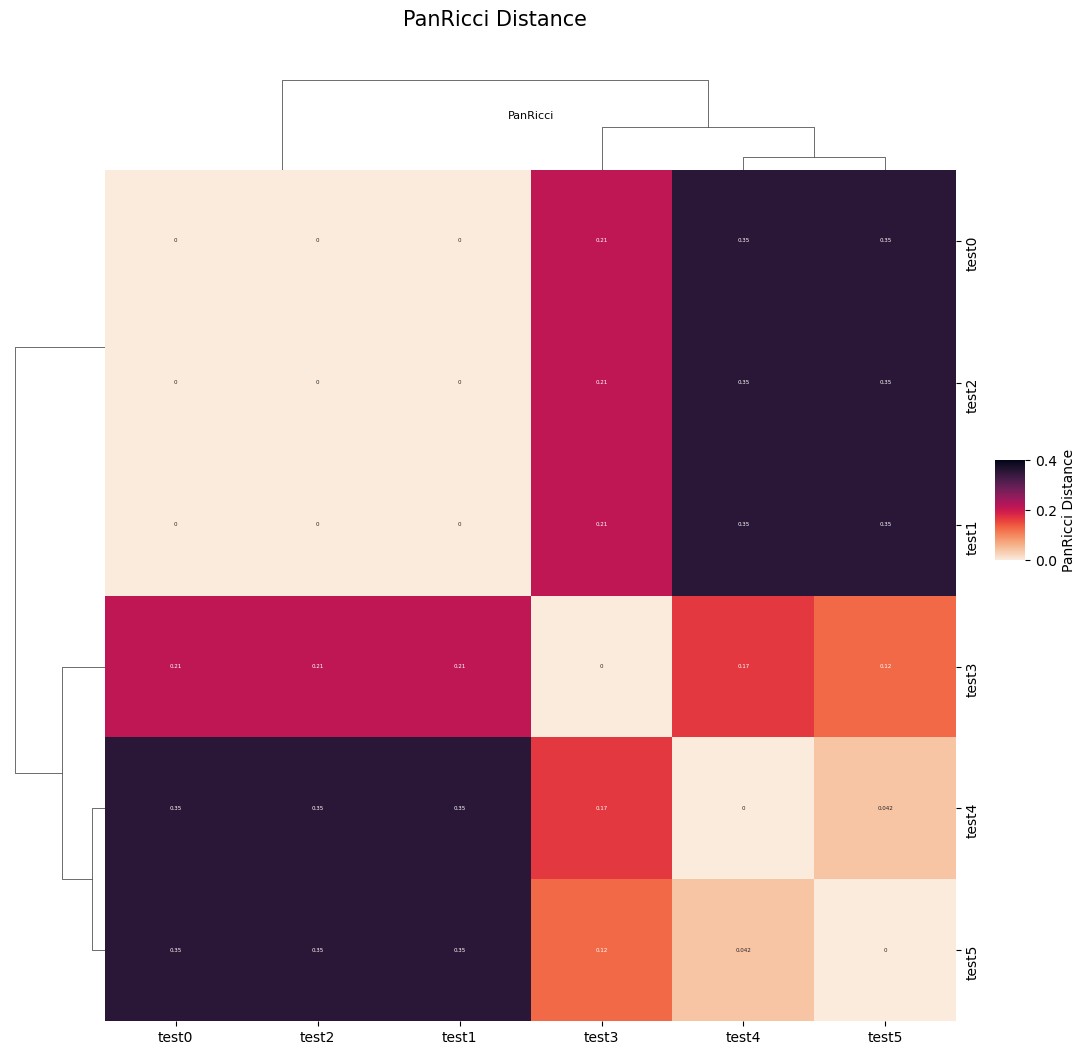

In [24]:
import pandas as pd
keys=[k.stem for k in gfas]
g=sns.clustermap(
                pd.DataFrame(D, index=keys, columns=keys), 
                row_linkage=linkage, col_linkage=linkage, 
                annot=True, annot_kws={"size": 4},
                cmap="rocket_r",
                vmin=0, vmax=0.4, figsize=(10,10), 
                cbar_pos=(1, 0.5, .03, .1),
                dendrogram_ratio=(.1, .1),
                cbar_kws={"label": "PanRicci Distance"}
                )
g.ax_cbar.set_ylabel("PanRicci Distance",)
g.fig.suptitle(f"PanRicci Distance",y=1.05, size=15)
g.ax_heatmap.set_title(f"PanRicci", size=8, y=1.05)


